In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
# ggplot import *
#import ggplot
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')
sample = pd.read_csv('sample_submission.csv')



In [64]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [65]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52


In [66]:
members.head()
members.shape

(34403, 7)

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 6 columns):
msno                  19999 non-null object
song_id               19999 non-null object
source_system_tab     19932 non-null object
source_screen_name    19423 non-null object
source_type           19949 non-null object
target                19999 non-null int64
dtypes: int64(1), object(5)
memory usage: 937.5+ KB


In [68]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 7 columns):
song_id        39999 non-null object
song_length    39999 non-null int64
genre_ids      39282 non-null object
artist_name    39999 non-null object
composer       23203 non-null object
lyricist       10913 non-null object
language       39999 non-null int64
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [69]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


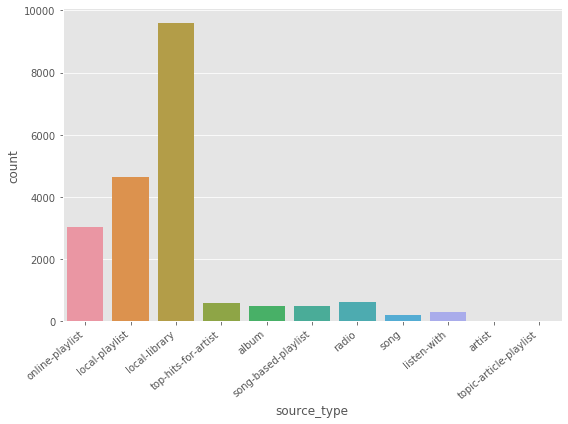

In [70]:
import seaborn as sns
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "source_type", data = train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

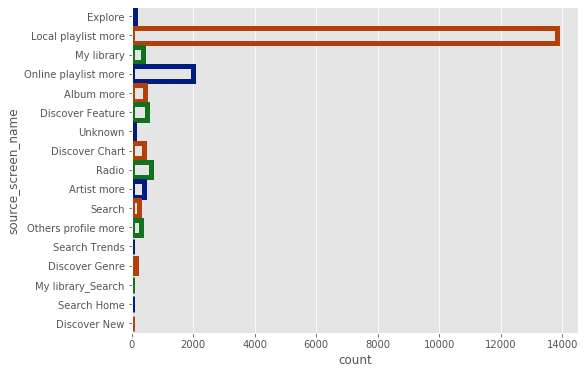

In [71]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(y=train['source_screen_name'], data=train, facecolor=(0, 0, 0, 0),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 3))
plt.show()

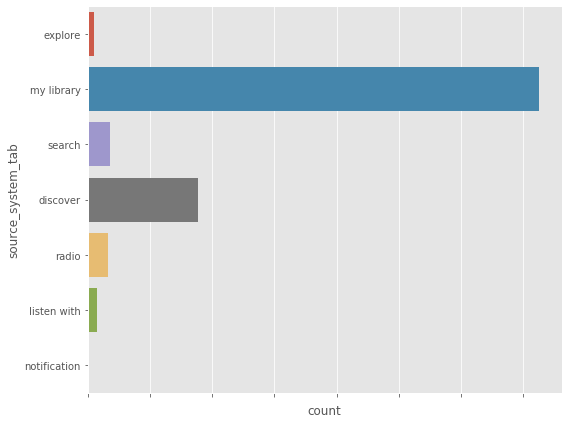

In [72]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(y = "source_system_tab", data = train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="left")
plt.tight_layout()
plt.show()

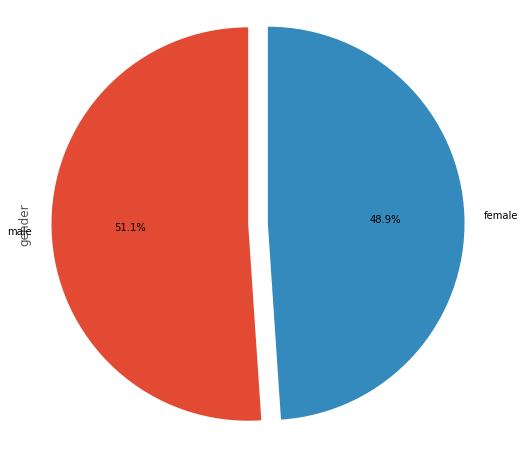

In [73]:

plt.figure(figsize = (8, 8))
pp = pd.value_counts(members.gender)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, explode=(0.05, 0.05))
plt.axis('equal')
plt.show()

In [74]:
train_members = pd.merge(train, members, on='msno', how='inner')
train_merged = pd.merge(train_members, songs, on='song_id', how='outer')
print(train_merged.head())
print(len(train_merged.columns))
print('\n')
#--- Performing the same for test set ---
test_members = pd.merge(test, members, on='msno', how='inner')
test_merged = pd.merge(test_members, songs, on='song_id', how='outer')
print(test_merged.head())
print(len(test_merged.columns))

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
2  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
3  hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   
2  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=           explore   
3  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=          discover   
4  bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=           explore   

  source_screen_name      source_type  target  city    bd gender  \
0            Explore  online-playlist     1.0   1.0   0.0    NaN   
1            Explore  online-playlist     1.0   1.0   0.0    NaN   
2            Explore  online-playlist     1.0   1.0   0.0    NaN   
3     

In [75]:
del train_members
del test_members

In [76]:
print(train_merged.columns.to_series().groupby(train_merged.dtypes).groups)

{dtype('float64'): Index(['target', 'city', 'bd', 'registered_via', 'registration_init_time',
       'expiration_date', 'song_length', 'language'],
      dtype='object'), dtype('O'): Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'gender', 'genre_ids', 'artist_name', 'composer',
       'lyricist'],
      dtype='object')}


In [77]:
print(test_merged.columns.to_series().groupby(test_merged.dtypes).groups)

{dtype('float64'): Index(['id', 'city', 'bd', 'registered_via', 'registration_init_time',
       'expiration_date', 'song_length', 'language'],
      dtype='object'), dtype('O'): Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'gender', 'genre_ids', 'artist_name', 'composer',
       'lyricist'],
      dtype='object')}


In [78]:
#--- Function to check if missing values are present and if so print the columns having them ---
def check_missing_values(df):
    print (df.isnull().values.any())
    if (df.isnull().values.any() == True):
        columns_with_Nan = df.columns[df.isnull().any()].tolist()
    print(columns_with_Nan)
    for col in columns_with_Nan:
        print("%s : %d" % (col, df[col].isnull().sum()))
    
check_missing_values(train_merged)
check_missing_values(test_merged)

True
['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
msno : 38665
source_system_tab : 38732
source_screen_name : 39241
source_type : 38715
target : 38665
city : 38665
bd : 38665
gender : 46377
registered_via : 38665
registration_init_time : 38665
expiration_date : 38665
song_length : 17154
genre_ids : 17895
artist_name : 17154
composer : 34148
lyricist : 46653
language : 17154
True
['id', 'msno', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
id : 39524
msno : 39524
source_system_tab : 39527
source_screen_name : 39742
source_type : 39526
city : 39524
bd : 39524
gender : 41665
registered_via : 39524
registration_init_time

In [79]:
#--- Function to replace Nan values in columns of type float with -5 ---
def replace_Nan_non_object(df):
    object_cols = list(df.select_dtypes(include=['float']).columns)
    for col in object_cols:
        df[col]=df[col].fillna(np.int(-5))
       
replace_Nan_non_object(train_merged) 
replace_Nan_non_object(test_merged)  

In [80]:
#--- Function to replace Nan values in columns of type object with 'Others' ---
def replace_Nan_object(df):
    object_cols = list(df.select_dtypes(include=['object']).columns)
    for col in object_cols:
        df[col]=df[col].fillna(' ')
    print (object_cols)

replace_Nan_object(train_merged)  
replace_Nan_object(test_merged)  
#check_missing_values(cop)
#print(object_cols)

['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']
['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']


In [81]:
#--- memory consumed by train dataframe ---
mem = train_merged.memory_usage(index=True).sum()
print("Memory consumed by training set  :   {} MB" .format(mem/ 1024**2))
 
#--- memory consumed by test dataframe ---
mem = test_merged.memory_usage(index=True).sum()
print("Memory consumed by test set      :   {} MB" .format(mem/ 1024**2))

Memory consumed by training set  :   8.50384521484375 MB
Memory consumed by test set      :   6.453987121582031 MB


In [82]:
def change_datatype(df):
    float_cols = list(df.select_dtypes(include=['float']).columns)
    for col in float_cols:
        if ((np.max(df[col]) <= 127) and(np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and(np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647) and(np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)

change_datatype(train_merged)
change_datatype(test_merged)           

In [83]:
train_merged = train_merged[train_merged.target != -5]
len(train_merged.index)

19999

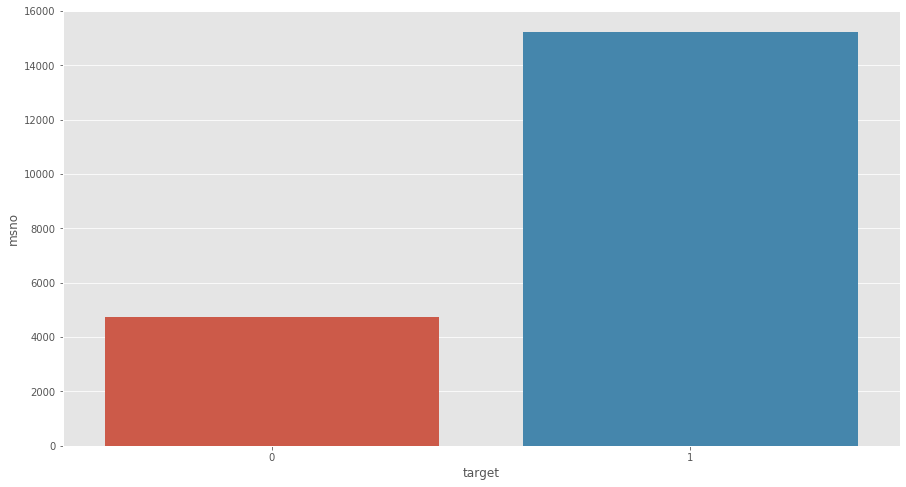

In [84]:
data = train_merged.groupby('target').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='target', y='msno', data=data)

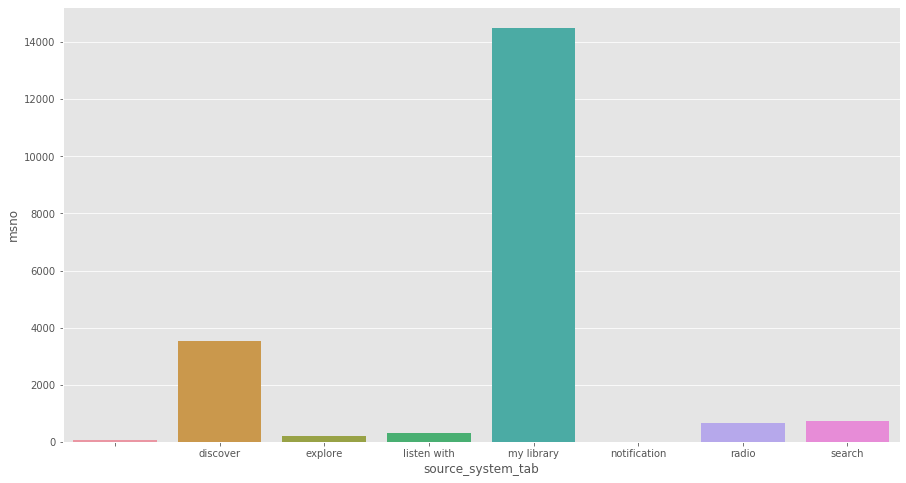

In [85]:
data = train_merged.groupby('source_system_tab').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_system_tab', y='msno', data=data)

[Text(0, 0, ' '),
 Text(0, 0, 'Album more'),
 Text(0, 0, 'Artist more'),
 Text(0, 0, 'Discover Chart'),
 Text(0, 0, 'Discover Feature'),
 Text(0, 0, 'Discover Genre'),
 Text(0, 0, 'Discover New'),
 Text(0, 0, 'Explore'),
 Text(0, 0, 'Local playlist more'),
 Text(0, 0, 'My library'),
 Text(0, 0, 'My library_Search'),
 Text(0, 0, 'Online playlist more'),
 Text(0, 0, 'Others profile more'),
 Text(0, 0, 'Radio'),
 Text(0, 0, 'Search'),
 Text(0, 0, 'Search Home'),
 Text(0, 0, 'Search Trends'),
 Text(0, 0, 'Unknown')]

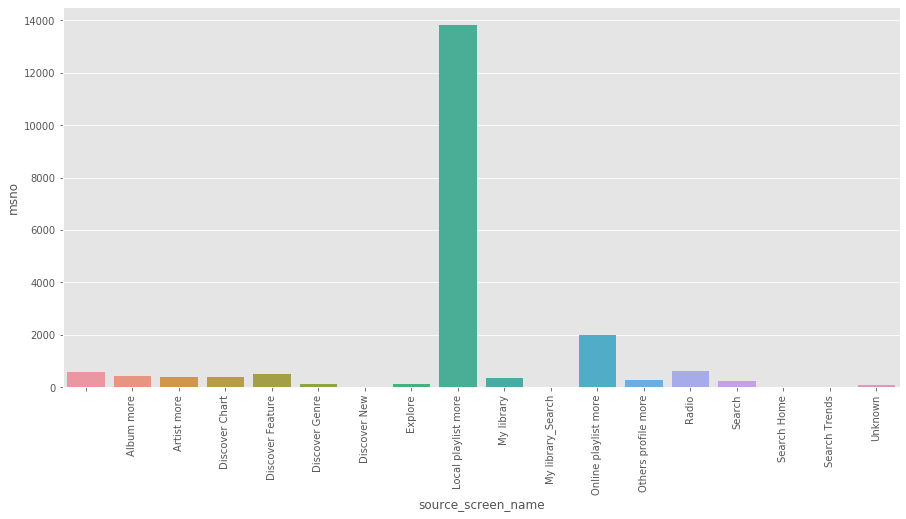

In [86]:
data = train_merged.groupby('source_screen_name').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_screen_name', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, ' '),
 Text(0, 0, 'album'),
 Text(0, 0, 'artist'),
 Text(0, 0, 'listen-with'),
 Text(0, 0, 'local-library'),
 Text(0, 0, 'local-playlist'),
 Text(0, 0, 'online-playlist'),
 Text(0, 0, 'radio'),
 Text(0, 0, 'song'),
 Text(0, 0, 'song-based-playlist'),
 Text(0, 0, 'top-hits-for-artist'),
 Text(0, 0, 'topic-article-playlist')]

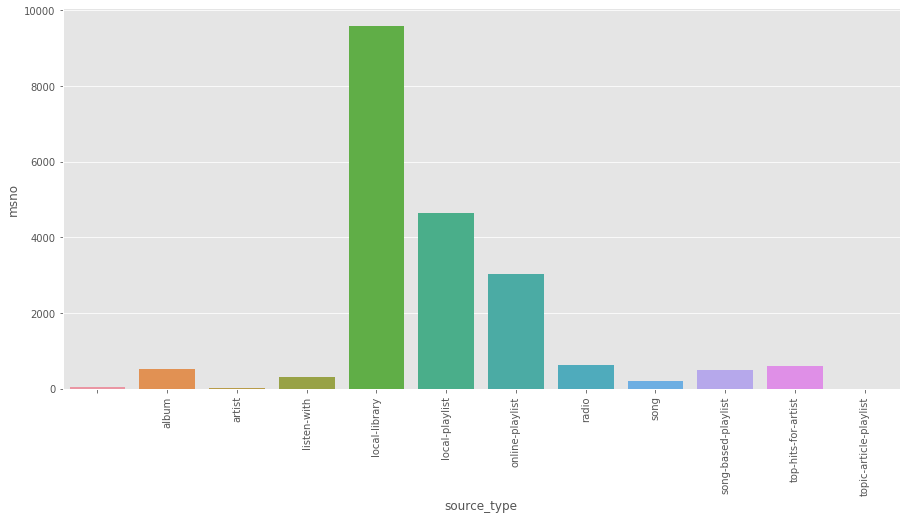

In [87]:
data = train_merged.groupby('source_type').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_type', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '-5'),
 Text(0, 0, '-1'),
 Text(0, 0, '3'),
 Text(0, 0, '10'),
 Text(0, 0, '17'),
 Text(0, 0, '24'),
 Text(0, 0, '31'),
 Text(0, 0, '52'),
 Text(0, 0, '59')]

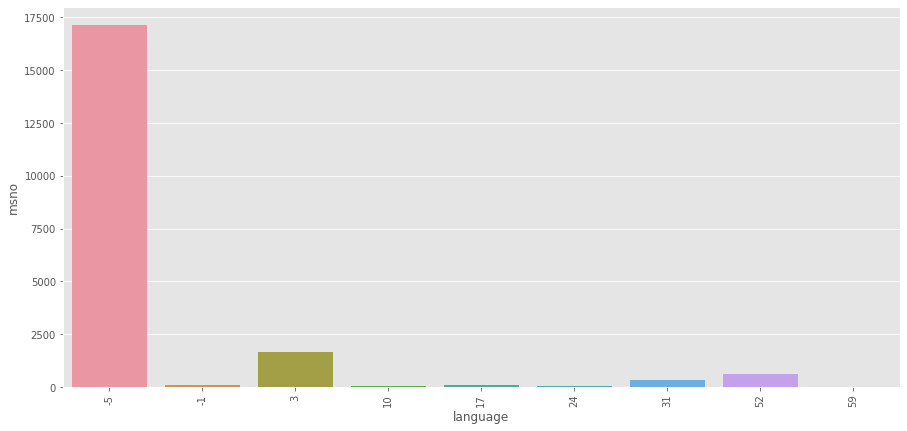

In [88]:
data = train_merged.groupby('language').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='language', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22')]

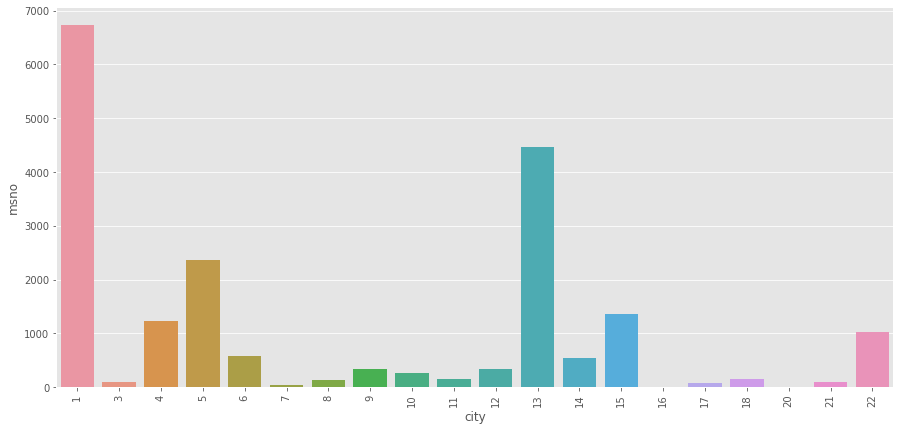

In [89]:
data = train_merged.groupby('city').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='city', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [90]:
# Load Python libraries
#grid search, XG boost not loaded
from sklearn import model_selection, metrics, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [91]:
# Load data
df = pd.read_csv('train.csv')

# 1% sample of items
df = df.sample(frac=0.01)

In [92]:
# Load and join songs data
songs = pd.read_csv('songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 18 columns):
msno                      200 non-null object
song_id                   200 non-null object
source_system_tab         198 non-null object
source_screen_name        193 non-null object
source_type               199 non-null object
target                    200 non-null int64
song_length               35 non-null float64
genre_ids                 35 non-null object
artist_name               35 non-null object
composer                  29 non-null object
lyricist                  24 non-null object
language                  35 non-null float64
city                      200 non-null int64
bd                        200 non-null int64
gender                    125 non-null object
registered_via            200 non-null int64
registration_init_time    200 non-null int64
expiration_date           200 non-null int64
dtypes: float64(2), int64(6), object(10)
memory usage: 29.7+ KB


In [94]:
# Count Na in %
df.isnull().sum()/df.isnull().count()*100

msno                       0.0
song_id                    0.0
source_system_tab          1.0
source_screen_name         3.5
source_type                0.5
target                     0.0
song_length               82.5
genre_ids                 82.5
artist_name               82.5
composer                  85.5
lyricist                  88.0
language                  82.5
city                       0.0
bd                         0.0
gender                    37.5
registered_via             0.0
registration_init_time     0.0
expiration_date            0.0
dtype: float64

In [95]:
# Replace NA
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [96]:
# Create Dates

# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [97]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,MTMvld3LXtpnZ7+3UR+cnwpSon0p5uWFTtvH5IkwaqM=,SdxebP03MFGAFMHikVpIjYrzNzObrDPP5/20R6onsDk=,my library,Local playlist more,local-library,1,0.0,unknown,unknown,unknown,...,female,9,2011-10-21,2017-09-30,2011,10,21,2017,9,30
1,wRRfEJkyLUnofGeOa6KQ5gkZP9Xi6accfqPas93xiBM=,limwLMOy3/jAQ5dOa3x7k/eJmA1ARXel99C337h+E34=,discover,Online playlist more,online-playlist,0,0.0,unknown,unknown,unknown,...,female,3,2014-12-29,2017-09-06,2014,12,29,2017,9,6
2,Jp+DbYLwkRZbhmNwaAnXWrljVvkaeP4/quROZx0VkEA=,JuOOeJJjt5Dgbug0czZ6Mv25AJMtVAukaoxz8T/JX7c=,discover,unknown,online-playlist,1,0.0,unknown,unknown,unknown,...,female,9,2011-09-04,2017-05-17,2011,9,4,2017,5,17
3,Qi5ZjETGV2CmNsrMWyqmdZ6ECGkDmAUkv8xWYfn5y6U=,TIwOs7iFTKo3Cy2yiNReYYcZc1JyAx+0k08+z97k1dA=,my library,Local playlist more,local-library,1,0.0,unknown,unknown,unknown,...,unknown,7,2016-03-19,2017-09-18,2016,3,19,2017,9,18
4,Do3GiptNdtMObXhaPfdMr/sfm46ragAG3bQbGZItLRg=,nnGh305rOmte1K/4D+qsL1LyY6P+jvDlzATIqwbCa/0=,my library,Local playlist more,local-playlist,1,0.0,unknown,unknown,unknown,...,male,3,2014-02-21,2017-10-01,2014,2,21,2017,10,1


In [98]:
# Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [99]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

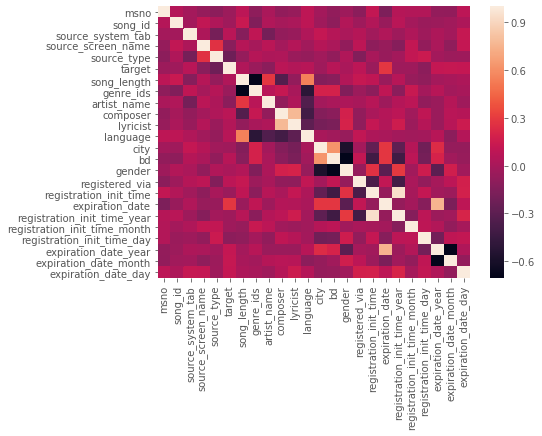

In [100]:
# Сorrelation matrix
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

In [101]:
# Drop columns
df = df.drop(['expiration_date', 'lyricist'], 1)

In [102]:
# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

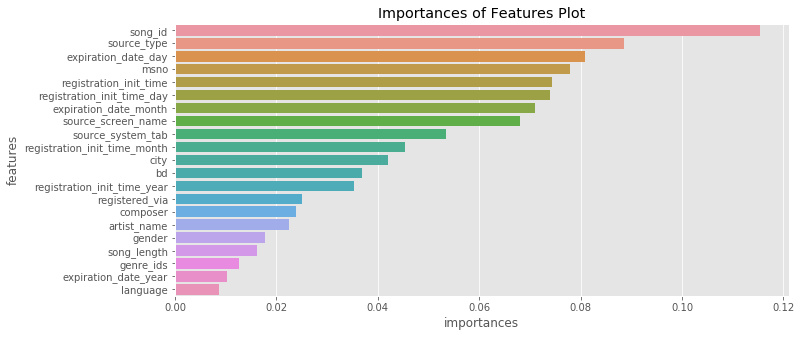

In [104]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [105]:
# Drop columns with importances < 0.04
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [106]:
# Selected columns
df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'registration_init_time',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [107]:
# Train & Test split
#target = df.pop('target')
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(df, target, test_size = 0.3)

# Delete df
del df

In [108]:
# Create model
from xgboost.sklearn import XGBClassifier 
model = XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [109]:
# Predicting
predict_labels = model.predict(test_data)

In [110]:
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.78      0.90      0.83        48

    accuracy                           0.72        60
   macro avg       0.39      0.45      0.42        60
weighted avg       0.63      0.72      0.67        60



In [111]:
print(metrics.accuracy_score(test_labels, predict_labels))

0.7166666666666667
